# IGRA


Download data from the **Integrated Global Radiosonde Archive (IGRA)**: https://www.ncdc.noaa.gov/data-access/weather-balloon/integrated-global-radiosonde-archive

In [1]:
from pansat.products.stations import igra

## Per station 

For the download for a specific station, select the station name or look for the closest station to a location[lat,lon]. 



In [2]:
# create product instance for station location (finds closest station to [lat,lon])
radiosounding = igra.IGRASoundings(station=[35,105])

Please enter your pansat user password:
········


In [6]:
# have a look at the meta data from the station 
radiosounding.station

,ID,lat,lon,n,name,start,end,nr
553,CHM00057006,34.583,105.75,1143.0,TIANSHUI,1973,1987,6899


In [7]:
# have a look at the meta data from all stations 
radiosounding.locs

,ID,lat,lon,n,name,start,end,nr
0,ACM00078861,17.1170,-61.7830,10.0,COOLIDGE FIELD (UA),1947,1993,13896
1,AEM00041217,24.4333,54.6500,16.0,ABU DHABI INTERNATIONAL AIRPOR,1983,2020,37511
2,AEXUAE05467,25.2500,55.3700,4.0,SHARJAH,1935,1942,2477
3,AFM00040911,36.7000,67.2000,378.0,MAZAR-I-SHARIF,2010,2014,2179
4,AFM00040913,36.6667,68.9167,433.0,KUNDUZ,2010,2013,4540
...,...,...,...,...,...,...,...,...
2783,ZZXUAICE022,-98.8888,-998.8888,-998.8,NP22,1974,1982,2862
2784,ZZXUAICE026,-98.8888,-998.8888,-998.8,NP26,1983,1986,824
2785,ZZXUAICE028,-98.8888,-998.8888,-998.8,NP28,1986,1988,915
2786,ZZXUAICE030,-98.8888,-998.8888,-998.8,NP30,1988,1990,576


In [8]:
# download all data for station by name 
radiosounding = igra.IGRASoundings('ABU DHABI INTERNATIONAL AIRPOR')
file = radiosounding.download()

## Per variable (monthly, all stations)

To download data from all stations, choose a variable to download. This data will come as 
monthly means in two separate files for day and night (00:00 UTC and 12:00 UTC). 

In [23]:
radiosounding = igra.IGRASoundings(variable = 'temp')

In [24]:
# download only recent month
files = radiosounding.download('recent')

## Open and plot data 

In [83]:
# get data as pandas dataframe 
data00= radiosounding.open(files[0])
data12= radiosounding.open(files[1])

data00

,Station,Year,Month,Level [hPa],"Value [$^\circ$C/10, m s$^{-1}$ or Pa]",Num
0,AEM00041217,2020,11,1000,247,30
1,AEM00041217,2020,11,925,221,30
2,AEM00041217,2020,11,850,168,30
3,AEM00041217,2020,11,700,84,30
4,AEM00041217,2020,11,500,-73,30
...,...,...,...,...,...,...
9191,VMM00048900,2020,11,70,-739,25
9192,VMM00048900,2020,11,50,-652,25
9193,VMM00048900,2020,11,30,-566,25
9194,VMM00048900,2020,11,20,-504,23


In [115]:
# choose a station 
station = data00.Station.values[999]
temp00 = data00[data00.Station == station]
temp12 = data12[data12.Station == station]

# get station name 
station_name= radiosounding.locs[radiosounding.locs.ID == station].name.values[0]

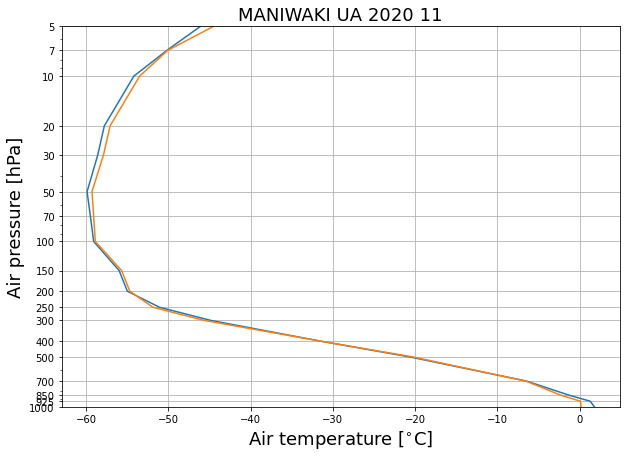

In [117]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,7))
# plot temperature at specific station during two times a day
pressure= temp00.iloc[:,3].values
# set surface pressure to 1000 hPa 
pressure[pressure == 9999]= 1000

plt.plot(temp00.iloc[:,4].values/10,pressure, label = '00:00 UTC')
plt.plot(temp12.iloc[:,4].values/10,pressure, label ='12:00 UTC')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks(temp00.iloc[:,3], temp00.iloc[:,3])
plt.ylim(pressure.max(), pressure.min())
plt.grid()

# labels 
fs= 18
plt.title(station_name + ' '+ str(temp00.Year.values[0]) + ' '+str(temp00.Month.values[0]),fontsize= fs) 
plt.xlabel('Air temperature [$^{\circ}$C]', fontsize= fs)
plt.ylabel('Air pressure [hPa]', fontsize= fs)
plt.show()